<a href="https://colab.research.google.com/github/sinhadeepak1115/tensorflow-deep-learning/blob/main/ML_03_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction of Convolutional Neural Network and Computer vision with Tf

In [2]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-08-01 20:58:00--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.200.128, 209.85.234.128, 142.251.172.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   137MB/s    in 0.8s    

2023-08-01 20:58:01 (137 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



##Crucial step is to become one with the data in machine learning.

In [3]:
!ls pizza_steak

test  train


In [4]:
import os
# Walk through direcory and list number in files
for dirpath, dirnames, filename in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directory and {len(filename)} images in {(dirpath)} path.")

There are 2 directory and 0 images in pizza_steak path.
There are 2 directory and 0 images in pizza_steak/test path.
There are 0 directory and 250 images in pizza_steak/test/steak path.
There are 0 directory and 250 images in pizza_steak/test/pizza path.
There are 2 directory and 0 images in pizza_steak/train path.
There are 0 directory and 750 images in pizza_steak/train/steak path.
There are 0 directory and 750 images in pizza_steak/train/pizza path.


the extra 1 file is DS_Store

In [5]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [6]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 382, 3)


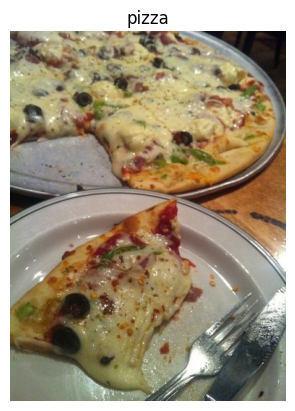

In [8]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [9]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 382, 3), dtype=uint8, numpy=
array([[[126, 114,  90],
        [127, 115,  91],
        [125, 110,  87],
        ...,
        [  4,   3,   9],
        [  5,   4,  10],
        [  5,   4,  10]],

       [[114, 102,  80],
        [117, 105,  83],
        [117, 102,  81],
        ...,
        [  5,   4,  10],
        [  5,   4,  10],
        [  5,   4,  10]],

       [[105,  90,  71],
        [108,  93,  74],
        [108,  93,  74],
        ...,
        [  5,   4,  10],
        [  5,   4,  10],
        [  5,   4,  10]],

       ...,

       [[120, 120,  96],
        [123, 123,  99],
        [124, 123, 102],
        ...,
        [124, 131, 123],
        [123, 130, 122],
        [122, 129, 121]],

       [[118, 116,  91],
        [122, 120,  95],
        [123, 121, 100],
        ...,
        [124, 131, 123],
        [122, 129, 122],
        [121, 128, 121]],

       [[115, 114,  86],
        [120, 118,  93],
        [121, 119,  96],
        ...,
        [123, 130, 12

normalize data

In [10]:
img/255.

array([[[0.49411765, 0.44705882, 0.35294118],
        [0.49803922, 0.45098039, 0.35686275],
        [0.49019608, 0.43137255, 0.34117647],
        ...,
        [0.01568627, 0.01176471, 0.03529412],
        [0.01960784, 0.01568627, 0.03921569],
        [0.01960784, 0.01568627, 0.03921569]],

       [[0.44705882, 0.4       , 0.31372549],
        [0.45882353, 0.41176471, 0.3254902 ],
        [0.45882353, 0.4       , 0.31764706],
        ...,
        [0.01960784, 0.01568627, 0.03921569],
        [0.01960784, 0.01568627, 0.03921569],
        [0.01960784, 0.01568627, 0.03921569]],

       [[0.41176471, 0.35294118, 0.27843137],
        [0.42352941, 0.36470588, 0.29019608],
        [0.42352941, 0.36470588, 0.29019608],
        ...,
        [0.01960784, 0.01568627, 0.03921569],
        [0.01960784, 0.01568627, 0.03921569],
        [0.01960784, 0.01568627, 0.03921569]],

       ...,

       [[0.47058824, 0.47058824, 0.37647059],
        [0.48235294, 0.48235294, 0.38823529],
        [0.48627451, 0

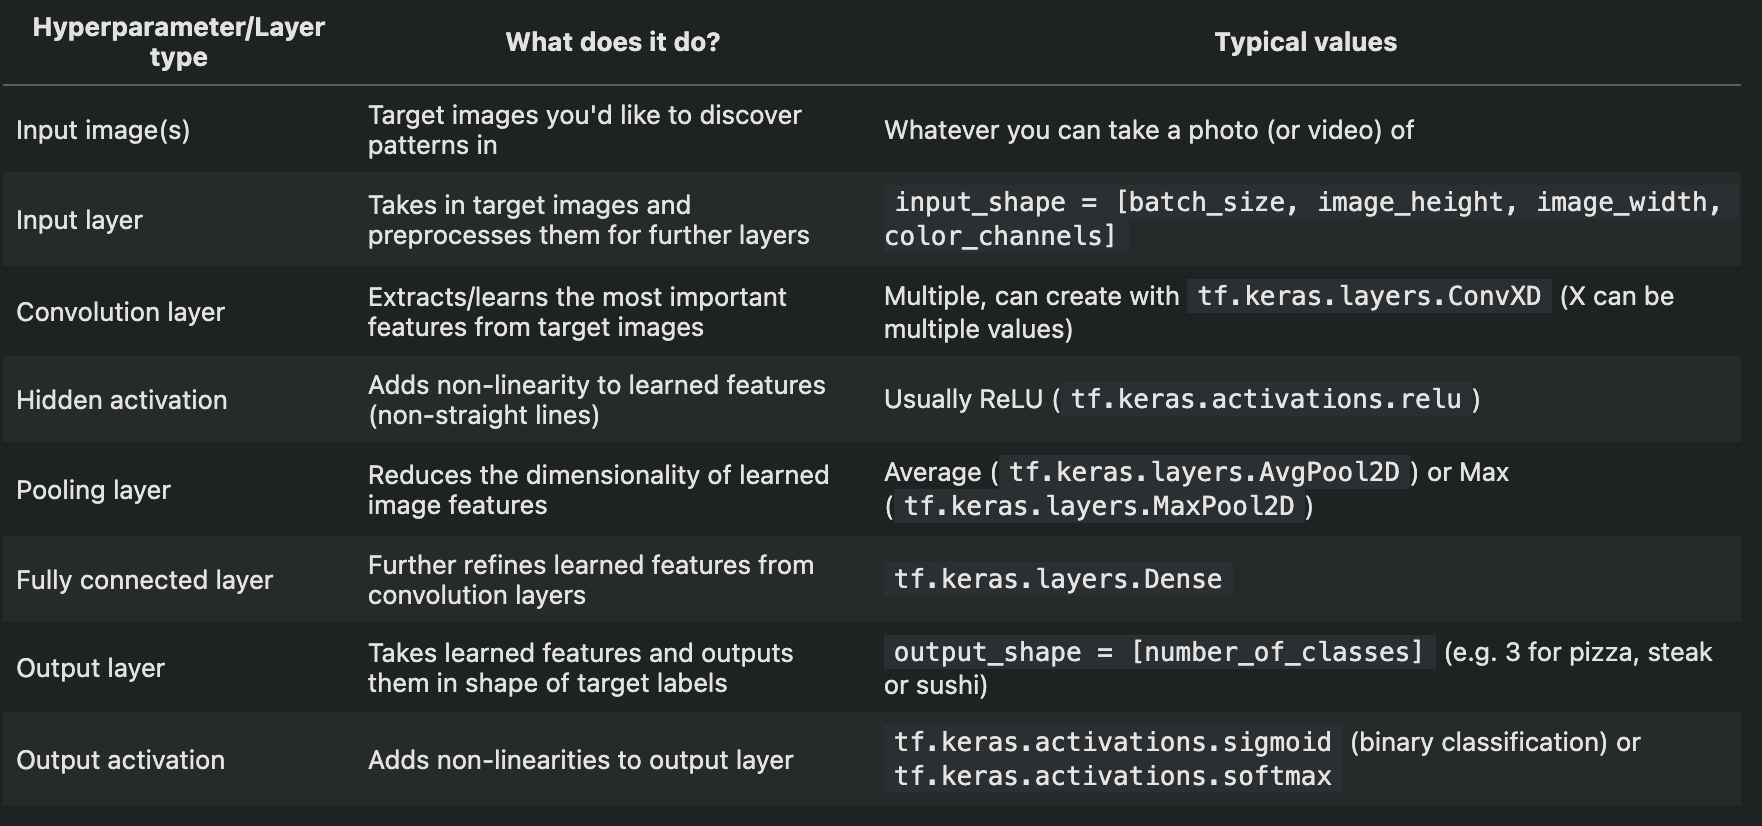

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# import data form dir and turn into batches

train_dir = "pizza_steak/train"
test_dir  = "pizza_steak/test"

train_data = train_datagen.flow_from_directory(train_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [12]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size =3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_1 = model_1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 22s 151ms/step - loss: 0.5601 - accuracy: 0.7100 - val_loss: 0.4110 - val_accuracy: 0.8340
Epoch 2/5
47/47 [==============================] - 8s 166ms/step - loss: 0.4420 - accuracy: 0.8087 - val_loss: 0.4045 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 5s 115ms/step - loss: 0.4395 - accuracy: 0.8073 - val_loss: 0.3953 - val_accuracy: 0.8240
Epoch 4/5
47/47 [==============================] - 7s 143ms/step - loss: 0.3767 - accuracy: 0.8440 - val_loss: 0.3423 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 7s 149ms/step - loss: 0.3205 - accuracy: 0.8633 - val_loss: 0.3488 - val_accuracy: 0.8560


In [13]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [14]:
from keras.optimizers import optimizer
tf.random.set_seed(0)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 109ms/step - loss: 1.3581 - accuracy: 0.5060 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 6s 120ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 11s 230ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 163ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 206ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [15]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [19]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
                )
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 7s 115ms/step - loss: 2.9102 - accuracy: 0.6280 - val_loss: 2.0451 - val_accuracy: 0.5440
Epoch 2/5
47/47 [==============================] - 5s 105ms/step - loss: 1.1941 - accuracy: 0.6973 - val_loss: 0.6473 - val_accuracy: 0.7340
Epoch 3/5
47/47 [==============================] - 7s 142ms/step - loss: 0.8033 - accuracy: 0.7040 - val_loss: 1.2314 - val_accuracy: 0.6000
Epoch 4/5
47/47 [==============================] - 5s 110ms/step - loss: 0.7929 - accuracy: 0.7367 - val_loss: 0.8497 - val_accuracy: 0.6800
Epoch 5/5
47/47 [==============================] - 6s 117ms/step - loss: 0.5635 - accuracy: 0.7693 - val_loss: 0.4475 - val_accuracy: 0.7820


In [20]:
model_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_16 (Dense)            (None, 100)               15052900  
                                                                 
 dense_17 (Dense)            (None, 100)               10100     
                                                                 
 dense_18 (Dense)            (None, 100)               10100     
                                                                 
 dense_19 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary classification: Let's break it down
We just went through a whirlwind of steps:

1. Become one with the data (visualize, visualize, visualize...)
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model (try to beat your baseline)
7. Repeat until satisfied

Let's step through each.

1. Import and become one with the data
Whatever kind of data you're dealing with, it's a good idea to visualize at least 10-100 samples to start to building your own mental model of the data.

In our case, we might notice that the steak images tend to have darker colours where as pizza images tend to have a distinct circular shape in the middle. These might be patterns that our neural network picks up on.

You an also notice if some of your data is messed up (for example, has the wrong label) and start to consider ways you might go about fixing it.